# Iris Flowers
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 
It could be used for both classification and regression problems.

<img src="img/1280px-Iris_versicolor_3.jpg" alt="iris versicolor" width="400"/>


# Penguins

Similar to the above dataset, this dataset contains measurements of several penguin species (Chinstrap, Gentoo, Adélie). 

It could be used for both classification and regression problems.
![ ](img\lter_penguins.png)
Access:

`import seaborn as sns`

`penguins = sns.load_dataset("penguins")`

# Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

![ ](img\1280px-RMS_Titanic_3.jpg)

# Housing Market

The dataset used in this project is the data of the houses sold in Melbourne from the period January 2016 to October 2018 posted by Tony Pino on Kaggle scrapped from publicly available results posted every week from Domain.com.au. Some of the data fields include Date, Price, Suburb, Region name, Landsize, Building size, Distance from CBD and others. 

![ ](img\1_XT0SA-RgUe6aHAmQfMvl8w.png)


Analysis Idea:
* Train a neural network to predict the house price based on the remaining datapoints
* Predict some categorical variable of the house (e.g. the region) using a decision tree classifier 

Some Data-Analysis Questions to answer:
* What will be the average price of the houses in different metropolitan regions of Melbourne in the second quarter of 2018?
* In which month are more houses sold in Melbourne?
* What are the top 10 suburbs of Melbourne by the price and the maximum number of houses sold?


Access: .csv file in `datasets` folder

# Tips
A dataset containing information about Restaurant customers, their meals and the ammoputn they tipped.
Use data visulisation to draw conclusions about tipping habits. Which factors best predict the value of the tip?

Access:
`import seaborn as sns`
`tips = sns.load_dataset("tips")`

# Handwritten Digits

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

![MNIST](img\MnistExamples.png)

Project Ideas:
Try to train a model and apply it to different handrawn digit images (maybe even your own). Research data augmentation techniques to improve your results. 

Access: 

`import tensorflow.keras as ks`

`import tensorflow as tf`

`mnist = ks.datasets.mnist`

# Cats vs Dogs
This dataste contains a set of 25'000 inmages of cats and dogs
Analysis idea:

Try to train a neural network that can reliably tell Cats from Dogs. Research a network structure that has been shown to work well for this task (e.g. Convoluional Neural Networks, the lecutrer can help you with this) and try to apply it on new data, for example an image of your pet! 

Access: https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765



In [26]:
import numpy as np
import os
from PIL import Image

# save images of img/kagglecatsanddogs/PetImages/Cat to array and add a second column of "cat" for the label of the image
cats, dogs = [], []
for i, filename in enumerate(os.listdir("img/kagglecatsanddogs/PetImages/Cat")):
    if filename.endswith(".jpg"):
        cats.append(np.array(Image.open("img/kagglecatsanddogs/PetImages/Cat/" + filename)),)
        if i < 1000:
            break
for i, filename in enumerate(os.listdir("img/kagglecatsanddogs/PetImages/Dog")):
    if filename.endswith(".jpg"):
        dogs.append(np.array(Image.open("img/kagglecatsanddogs/PetImages/Dog/" + filename)))
        dogs.append("dog")
        if i < 1000:
            break

images = np.concatenate((cats, dogs))
labels = np.concatenate(np.full(len(cats), "cat"), (np.full(len(dogs), "dog")))

x_train = images
x_test = images
y_train = labels
y_test = labels

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 1 dimension(s)

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
import tensorflow.keras as ks
import tensorflow as tf
from  keras_preprocessing.image import load_img, img_to_array
import io


cats = []
for filename in os.listdir("img/kagglecatsanddogs/PetImages/Cat"):
    if filename.endswith(".jpg"):
        cats.append((img_to_array(load_img(os.path.join("img/kagglecatsanddogs/PetImages/Cat/" + filename), target_size=(400, 400))), "cat"))
dogs = []
for filename in os.listdir("img/kagglecatsanddogs/PetImages/Dog"):
    if filename.endswith(".jpg"):
        cats.append((load_img("img/kagglecatsanddogs/PetImages//" + filename, target_size=(400, 400)), "cat"))
        dogs.append((os.path.join("img/kagglecatsanddogs/PetImages/Dog", filename), "dog"))


images = [x[0] for x in cats + dogs]
labels = [x[1] for x in cats + dogs]

x_train = images
x_test = images
y_train = labels
y_test = labels

# print first element of tuple in cats list
#print(cats[0])

#x_train, x_test = np.array(cats[0:] + dogs[0:])
#y_train, y_test = np.array(cats[1] + dogs[1])

#x_train, x_test = x_train / 255.0, x_test / 255.0



TypeError: BytesIO() takes at most 1 argument (2 given)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________


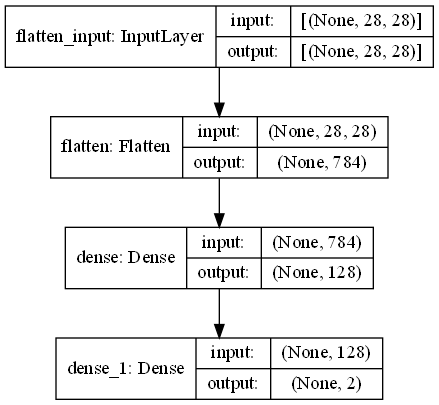

In [3]:
model = ks.models.Sequential([
  #Input layer created implicitly
  ks.layers.Flatten(input_shape=(28, 28)),#  reshape input (28 x 28) array to 1-D array, creating 784 nodes, one for each pixel
  ks.layers.Dense(128, activation='relu'), # Dense: all (128) nodes are connected to all preceding nodes
  ks.layers.Dense(2) # this is our output layer, with one node for each number
])

model.summary()

tf.keras.utils.plot_model(
model, to_file=os.path.join("img/model.png"), show_shapes=True, show_layer_names=True)

In [5]:
print(x_train)
predictions = model(x_train[:1]).numpy()
predictions

['img/kagglecatsanddogs/PetImages/Cat\\0.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\1.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\100.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\1000.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10000.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10001.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10002.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10003.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10004.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10005.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10006.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10007.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10008.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10009.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\1001.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10010.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10011.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10012.jpg', 'img/kagglecatsanddogs/PetImages/Cat\\10013.jpg', 'img/kagglecat

TypeError: Inputs to a layer should be tensors. Got: img/kagglecatsanddogs/PetImages/Cat\0.jpg